# Document Similarity of Abstracts from AERA Open

## Volume 5 Issue 4, October-December 2019
### https://journals-sagepub-com.proxy01.its.virginia.edu/toc/eroa/current

## Special Topic Collection March 2017
### https://journals-sagepub-com.proxy01.its.virginia.edu/page/ero/collections/special-topic-collections/ecls-k

In [45]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from scipy import spatial
from scipy import linalg
import numpy as np
import matplotlib.pyplot as plt

In [3]:
clean_filepath = "/Users/kylieleblancKylie/domino/docsim/data/clean/"
data_filepath =  "/Users/kylieleblancKylie/domino/docsim/data/aera_open_text/"

In [5]:
df_open = pd.read_csv(data_filepath + 'aera_open_text_raw.csv')
df_open = df_open.set_index('doc')
df_open.sample(5)

,raw_text
doc,
10.1177/2332858419875440,There is growing interest in the relation betw...
10.1177/2332858419890326,Handwriting practice is the most time-consumin...
10.1177/2332858419879446,Perhaps more than at any other time in history...
10.1177/2332858419887736,Academic behaviors such as attendance are high...
10.1177/2332858419890322,"In this study, we extend research on the alloc..."


In [6]:
df_special = pd.read_csv(data_filepath + 'aera_special_text_raw.csv')
df_special = df_special.set_index('doc')
df_special.sample(5)

,raw_text
doc,
10.1177/2332858417701684,The introduction to this Special Topic Collect...
10.1177/2332858415616358,Recent accounts suggest that accountability pr...
10.1177/2332858416657343,Academic achievement gaps between high- and lo...
10.1177/2332858416653924,This study compares the early life experiences...
10.1177/2332858416655766,Leveraging data from two nationally representa...


In [7]:
df = df_open.append(df_special)
df.sample(5)

,raw_text
doc,
10.1177/2332858419879446,Perhaps more than at any other time in history...
10.1177/2332858417701684,The introduction to this Special Topic Collect...
10.1177/2332858419884891,"Over the past decade, U.S. immigration enforce..."
10.1177/2332858419890322,"In this study, we extend research on the alloc..."
10.1177/2332858419887736,Academic behaviors such as attendance are high...


In [58]:
docs = list(df.raw_text)
vec = CountVectorizer(stop_words = 'english')
X = vec.fit_transform(docs)
matrix = pd.DataFrame(X.toarray(), columns=vec.get_feature_names(), index = df.index)
matrix.sample()

,16,1990s,1998,1999,20,2000,2005,2006,2007,2008,...,white,word,work,workers,worse,year,years,young,younger,youth
doc,,,,,,,,,,,,,,,,,,,,,
10.1177/2332858415616358,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [59]:
matrix.shape

(21, 941)

## LSA

In [60]:
U, s, Vh = linalg.svd(matrix)
print(U.shape,  s.shape, Vh.shape)
m = matrix.shape[0]
n = matrix.shape[1]
sigma = np.zeros((m,n))
for i in range(min(m, n)):
    sigma[i, i] = s[i]
a1 = np.dot(U, np.dot(sigma, Vh))
matrix_svd = pd.DataFrame(a1, columns = matrix.columns, index = matrix.index)
#matrix_svd.round()
Vh

(21, 21) (21,) (941, 941)


array([[-1.08144410e-02, -2.73007213e-02, -4.49883653e-02, ...,
        -1.94641181e-02, -4.73243195e-03, -6.52876156e-02],
       [ 1.27530980e-02,  2.38413367e-02,  4.92891612e-02, ...,
         1.27734859e-02, -3.08833546e-03, -1.61173373e-01],
       [-4.66695971e-03, -9.09532284e-03, -2.55253122e-02, ...,
         1.59555292e-02, -5.46092998e-04, -4.26444561e-02],
       ...,
       [-6.01791850e-02,  6.71967776e-03,  1.16021110e-03, ...,
         9.82904509e-01, -2.64644956e-04,  8.79556561e-04],
       [ 1.02241900e-03, -7.47070880e-02,  3.13687365e-03, ...,
        -7.70335204e-04,  9.92646605e-01,  1.42641959e-05],
       [ 1.08333005e-03,  3.34152767e-03,  2.60510683e-03, ...,
         1.11276689e-03,  2.61667925e-04,  9.50801198e-01]])

In [61]:
from sklearn.decomposition import TruncatedSVD

# SVD represent documents and terms in vectors 
svd_model = TruncatedSVD(n_components=20, algorithm='randomized', n_iter=100, random_state=122)

svd_model.fit(matrix)

len(svd_model.components_)

20

In [62]:
terms = matrix.columns

for i, comp in enumerate(svd_model.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:7]
    print("Topic "+str(i)+": ")
    for t in sorted_terms:
        print(t[0])
        print(" ")

Topic 0: 
data
 
students
 
school
 
achievement
 
gaps
 
outcomes
 
research
 
Topic 1: 
lgbq
 
data
 
disparities
 
heterosexual
 
mischievous
 
responders
 
youth
 
Topic 2: 
support
 
personnel
 
students
 
schools
 
time
 
course
 
online
 
Topic 3: 
personnel
 
support
 
schools
 
data
 
ratios
 
distribution
 
allocation
 
Topic 4: 
data
 
teachers
 
school
 
finance
 
time
 
use
 
practice
 
Topic 5: 
ecls
 
distribution
 
learning
 
study
 
girls
 
early
 
gender
 
Topic 6: 
handwriting
 
practice
 
cfl
 
word
 
racial
 
white
 
recognition
 
Topic 7: 
mathematics
 
mathematical
 
learning
 
differences
 
research
 
elementary
 
term
 
Topic 8: 
teachers
 
anxiety
 
use
 
district
 
teacher
 
particularly
 
anxious
 
Topic 9: 
course
 
online
 
face
 
behaviors
 
teachers
 
high
 
courses
 
Topic 10: 
gap
 
discipline
 
influence
 
findings
 
study
 
association
 
course
 
Topic 11: 
ecls
 
communities
 
enforcement
 
immigration
 
secure
 
hispanic
 
findings
 
Topic 12: 
men

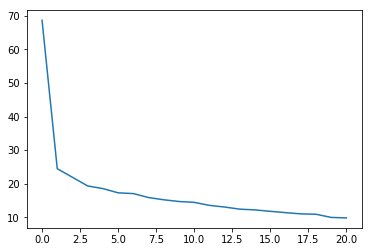

In [48]:
plt.plot(s)

In [49]:
s

array([68.70366392, 24.45250114, 21.88991545, 19.31355   , 18.52800038,
       17.26273337, 17.04011718, 15.85439579, 15.19158041, 14.67952271,
       14.42186755, 13.52428692, 13.02649858, 12.39783231, 12.17410662,
       11.7501925 , 11.36098188, 10.99400202, 10.87962169,  9.93719147,
        9.78718941])

In [63]:
matrix_open = matrix[matrix.index.isin(list(df_open.index))]
matrix_open

,16,1990s,1998,1999,20,2000,2005,2006,2007,2008,...,white,word,work,workers,worse,year,years,young,younger,youth
doc,,,,,,,,,,,,,,,,,,,,,
10.1177/2332858419879446,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
10.1177/2332858419879439,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,1,0
10.1177/2332858419879448,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
10.1177/2332858419875440,0,0,0,0,0,0,0,0,0,0,...,5,0,0,0,0,0,0,0,0,0
10.1177/2332858419883571,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10.1177/2332858419883822,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10.1177/2332858419884540,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10.1177/2332858419884905,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10.1177/2332858419884891,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [64]:
matrix_special = matrix[matrix.index.isin(list(df_special.index))]
matrix_special

,16,1990s,1998,1999,20,2000,2005,2006,2007,2008,...,white,word,work,workers,worse,year,years,young,younger,youth
doc,,,,,,,,,,,,,,,,,,,,,
10.1177/2332858417701684,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10.1177/2332858416673617,0,0,1,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10.1177/2332858416657343,1,2,2,0,1,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
10.1177/2332858416655766,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10.1177/2332858416653924,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
10.1177/2332858415616358,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


## In AERA Open

In [65]:
for maindoc in list(matrix_open.index):
    pairwise_sim = []
    for doc in list(matrix_open.index):
        sim = 1 - spatial.distance.cosine(matrix_open.loc[maindoc], matrix_open.loc[doc])
        pairwise_sim.append(sim)
    average = (sum(pairwise_sim) - 1)/(len(pairwise_sim) - 1) # don't include relationship with self
    df_open.at[maindoc, 'doc_sim'] = average
df_open.doc_sim.mean()

0.09395046788965822

## In AERA Special Issue

In [66]:
for maindoc in list(matrix_special.index):
    pairwise_sim = []
    for doc in list(matrix_special.index):
        sim = 1 - spatial.distance.cosine(matrix_special.loc[maindoc], matrix_special.loc[doc])
        pairwise_sim.append(sim)
    average = (sum(pairwise_sim) - 1)/(len(pairwise_sim) - 1) # don't include relationship with self
    df_special.at[maindoc, 'doc_sim'] = average
df_special.doc_sim.mean()

0.1683202422788986